<a href="https://colab.research.google.com/github/hrishikesht7/Ml--small-projects/blob/main/Ridge_and_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
housing =  fetch_california_housing()
df = pd.DataFrame(housing.data , columns = housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df.drop('MedHouseVal' , axis = 1)
y = df['MedHouseVal']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state= 42)
print("x train shape:",X_train.shape)
print("x test shape:",X_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

x train shape: (16512, 8)
x test shape: (4128, 8)
y train shape: (16512,)
y test shape: (4128,)


In [ ]:
ridge_model =Ridge(alpha = 1.0)
ridge_model.fit(X_train , y_train)


Ridge()

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
lasso_model = Lasso(alpha = 1.0)
lasso_model.fit(X_train , y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
def adj_r2(r2 , n ,p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

n = X_test.shape[0]
p = X_test.shape[1]

## Rigde
ridge_mse = mean_squared_error(y_test , y_pred_ridge)
ridge_r2 = r2_score(y_test , y_pred_ridge)
adj_r2 = adj_r2(ridge_r2,n,p)

print("Ridge Performance Matrix")
print("Mean Squared Error ",ridge_mse)
print("R2 score", ridge_r2)
print("adjested r2", adj_r2)

Ridge Performance Matrix
Mean Squared Error  0.5558034669932211
R2 score 0.5758549611440126
adjested r2 0.5750311785970721


In [ ]:
## Lasso
def adj_r2(r2 , n ,p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

n = X_test.shape[0]
p = X_test.shape[1]

lasso_mse = mean_squared_error(y_test , y_pred_lasso)
lasso_r2 = r2_score(y_test , y_pred_ridge)
lasso_adj_r2 = adj_r2(lasso_r2,n,p)

print("lasso performance matrics")
print("mean square error",lasso_mse)
print("lasso r2",lasso_r2)
print("lasso adjested r2",lasso_adj_r2)

lasso performance matrics
mean square error 0.9380337514945427
lasso r2 0.5758549611440126
lasso adjested r2 0.5750311785970721


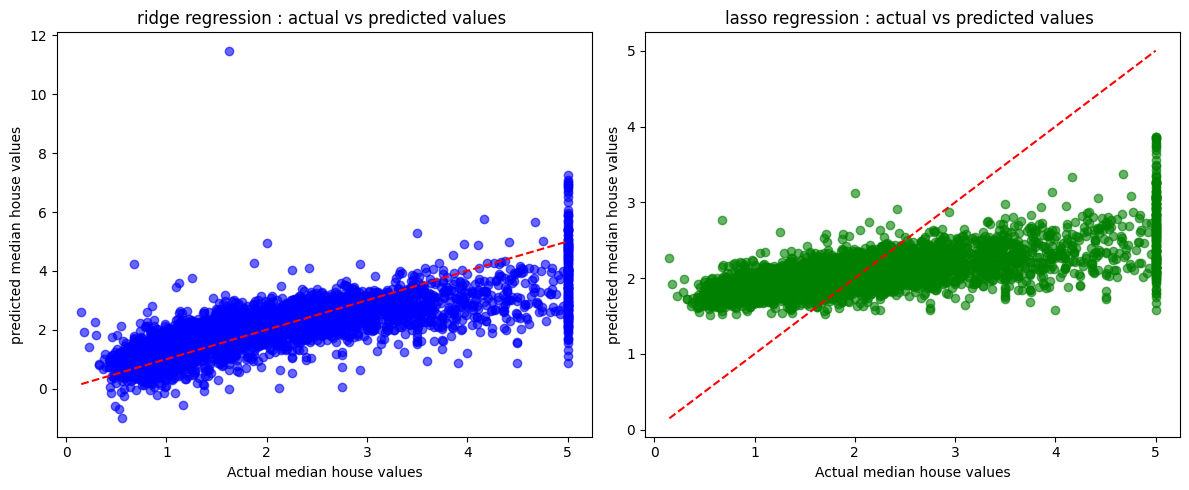

In [ ]:
plt.figure(figsize = (12,5))
## plot ridge regressor
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_ridge , alpha = 0.6 , color = 'blue')
plt.plot([y_test.min() , y_test.max()],[y_test.min(), y_test.max()],'r--')
plt.xlabel('Actual median house values')
plt.ylabel("predicted median house values")
plt.title("ridge regression : actual vs predicted values ")

# plot for lasso regression
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_lasso , alpha = 0.6 , color = 'green')
plt.plot([y_test.min() , y_test.max()],[y_test.min(), y_test.max()],'r--')
plt.xlabel('Actual median house values')
plt.ylabel("predicted median house values")
plt.title("lasso regression : actual vs predicted values ")

plt.tight_layout()
plt.show()

